# Fitting step responses

It is often prohibitively expensive to develop first principle models of processes and therefore it is very common to estimate low order transfer functions directly from plant data. This is simple to do if we have access to step test results.

In [1]:
import control
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Let's start with a higher order process to generate our "real data"

In [2]:
Greal = control.tf([1, 2], [2, 3, 4, 1])

In [3]:
ys, ts = control.step(Greal)

Remember that the real data will not necessarily start at zero, so we'll add in some value for the initial output. We will also add some normally distributed noise to represent measurement error.

In [4]:
yinitial = 10
measurement_noise = numpy.random.randn(len(ys))*0.05

In [5]:
ym = ys + yinitial + measurement_noise

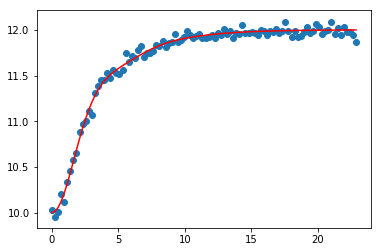

In [6]:
plt.scatter(ts, ym)
plt.plot(ts, ys + yinitial, color='red')

In [7]:
import scipy.optimize

In [8]:
def fopdt(t, tau, K, theta, y0):
    """ First Order Plus Dead Time response with bias. Note this assumes K > 0"""
    assert K > 0
    return numpy.maximum(y0, y0 + K*(1 - numpy.exp(-(t - theta)/tau)))

It is very important to have a good idea of the initial parameter values. Interaction makes it easy to figure out.

In [9]:
from ipywidgets import interact

In [10]:
def resultplot(tau, K, theta, y0):
    plt.scatter(ts, ym)
    plt.plot(ts, fopdt(ts, tau, K, theta, y0), color='red')
    plt.show()

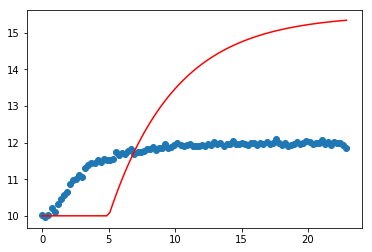

In [11]:
interact(resultplot, 
         tau=(0., 10.), 
         K=(1., 10.), 
         theta=(0., 10.), 
         y0=(0., 20.));

We can use the `scipy.optimize.curve_fit` tool to do this fit just like when we did regression without time.

In [12]:
scipy.optimize.curve_fit?

Signature: scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
    The independent variable where the data is measured.
ydata : M-length sequence
    The dependent data --- nominally f(xdata, ...)
p0 : None, scalar, or N-length sequence, optional
    Initial guess for the parameters.  If None, then the initial
    values will all be 1 (if the number of parameters for the function
    can be determined using introspection, otherwise a ValueError
    is raised).
sigma : None or M-length sequ

In [13]:
[tau, K, theta, y0], _ = scipy.optimize.curve_fit(fopdt, ts, ym, [4, 2, 1, 10])

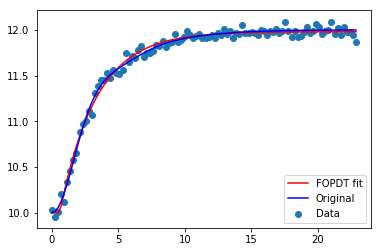

In [14]:
plt.scatter(ts, ym, label='Data')
plt.plot(ts, fopdt(ts, tau, K, theta, y0), color='red', label='FOPDT fit')
plt.plot(ts, ys + 10, color='blue', label='Original')
plt.legend(loc='best')